In [35]:
pip install kagglehub


In [36]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


Shayanfazeli MIT-BIH Data

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shree\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [38]:
print(os.listdir(path))
print("Dataset path",path)

['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']
Dataset path C:\Users\shree\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [39]:
train = pd.read_csv(os.path.join(path,'mitbih_train.csv'), header = None)
test = pd.read_csv(os.path.join(path,'mitbih_test.csv'), header = None)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
test.shape

(21892, 188)

In [41]:
train.shape

(87554, 188)

In [42]:
print(21892+87554)

109446


In [43]:
#109446 total samples

In [44]:
train[187].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64

In [45]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]



In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter =2000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accus = accuracy_score(y_pred,y_test)

print(accus*100, 'percent')

91.33930202813814 percent


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     19382
         1.0       0.37      0.84      0.51       245
         2.0       0.33      0.65      0.43       727
         3.0       0.30      0.58      0.40        84
         4.0       0.88      0.97      0.92      1454

    accuracy                           0.91     21892
   macro avg       0.57      0.79      0.64     21892
weighted avg       0.95      0.91      0.93     21892



In [50]:
sco = model.score(X_test,y_test)
print(sco)

0.9133930202813814


Quick Testing on new values

Converting samples into sin waves and then resampling it into 187 points

In [51]:
from scipy.signal import resample

def resample_signal_fft(signal, targrt_length = 187):
    resampled_signal = resample(signal,target_length)
    return resampled_signal




In [52]:
signal_1 = np.sin(np.linspace(0,4*np.pi,100))
signal_2 = np.cos(np.linspace(0,4*np.pi,150))
signal_3 = np.sin(np.linspace(0,4*np.pi,80))

target_length = 187

resampled_signals = np.array([
    resample_signal_fft(signal_1,target_length),
    resample_signal_fft(signal_2,target_length),
    resample_signal_fft(signal_3,target_length)
])

print("Resampled signal shape", resampled_signals.shape)

Resampled signal shape (3, 187)


In [53]:
predictions = model.predict(resampled_signals)
print("Pred", predictions)

Pred [1. 4. 1.]


As per Data:
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

N: Normal
S: Supraventricular premature beat
V: Premature ventricular contraction
F: Fusion of ventricular and normal beat
Q: Unclassifiable beat

In [54]:
print(np.unique(y_train))


[0. 1. 2. 3. 4.]


Cross Validation : To test the potential of the model on new data 
Using StratifiedKFolds to ensure proportional distribution of classes

In [55]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring = 'accuracy'

)

print("CV Accuracies", cv_scores)

CV Accuracies [0.9138827  0.9138256  0.91525327 0.91348295 0.91216448]


In [56]:
print("Mean CV accuracy", cv_scores.mean()*100) 

Mean CV accuracy 91.37217996057043


In [57]:
Testing_acc = model.score(X_test,y_test)
print("Testing Accuracy is", Testing_acc*100)

Testing Accuracy is 91.33930202813814


10 Fold CV

In [58]:
cvn = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cvn_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cvn,
    scoring = 'accuracy'

)

print("CV Accuracies", cvn_scores)

CV Accuracies [0.91560073 0.91263134 0.91434445 0.91308817 0.91182182 0.9184466
 0.91239292 0.91444889 0.91330668 0.91136493]


In [59]:
print("Mean CV accuracy", cvn_scores.mean()*100) 

Mean CV accuracy 91.37446526020894


Relevant Graphs

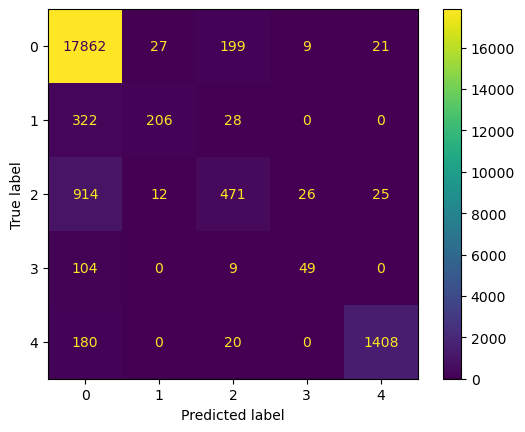

In [60]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

[Text(0, 0, '91.3722'), Text(0, 0, '91.3393')]

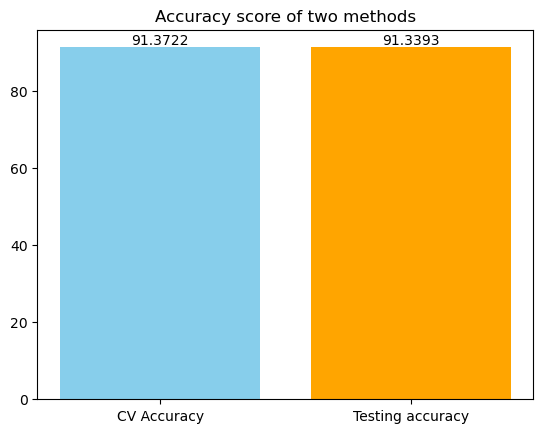

In [61]:
bars = plt.bar(['CV Accuracy','Testing accuracy'],[cv_scores.mean()*100, Testing_acc*100],color= ['skyblue','orange'])
plt.title("Accuracy score of two methods")
plt.bar_label(bars)


Using Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth = None,
    random_state=42,
    n_jobs=-1,
)

rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [67]:
y_pred = rf_clf.predict(X_test)

In [68]:
RF_acc = accuracy_score(y_pred,y_test)

print("Accuracy of RF Model", RF_acc*100)

Accuracy of RF Model 97.47853097021743


Text(0.5, 1.0, 'accuracy of different models')

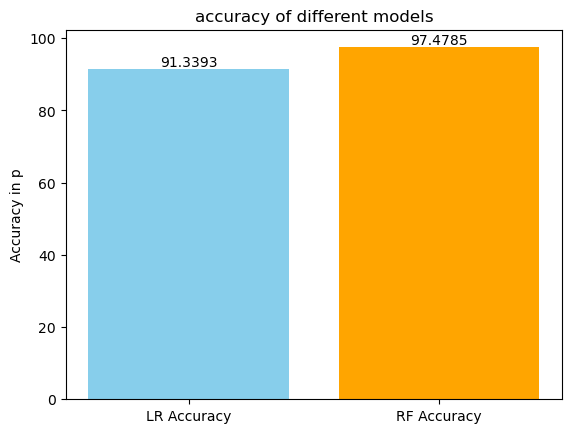

In [75]:
bars = plt.bar(['LR Accuracy','RF Accuracy'],[Testing_acc*100, RF_acc*100],color= ['skyblue','orange','blue'])
plt.title("Accuracy score of two methods")
plt.bar_label(bars)
plt.ylabel("Accuracy in p")
plt.title("accuracy of different models")

CV score for RF Model

In [87]:
#cv_rfscores = cross_val_score(
 #   rf_clf,
 #   X_train,
 #   y_train,
 #   cv = cvn,
 #   scoring = 'accuracy'
#)

#print("RF CV Accuracy", cv_rfscores.mean()*100)

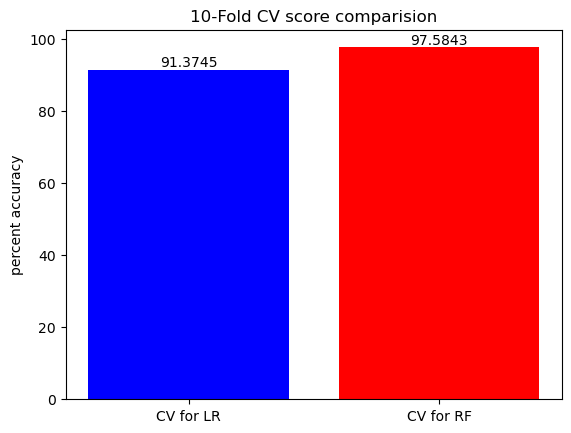

In [88]:

np.save("rfcv_Accuracy.npy",cv_rfscores)

nrfcv = np.load("rfcv_Accuracy.npy")

nbars = plt.bar(['CV for LR','CV for RF'], [cvn_scores.mean()*100 , cv_rfscores.mean()*100], color = ['blue','red'])
plt.title("10-Fold CV score comparision")
plt.bar_label(nbars)
plt.ylabel('percent accuracy')
plt.show()


NN Model

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [85]:
pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 2.7 MB/s eta 0:02:02
   ---------------------------------------- 1.6/332.0 MB 3.1 MB/s eta 0:01:47
   ---------------------------------------- 2.4/332.0 MB 3.3 MB/s eta 0:01:39
   ---------------------------------------- 3.1/332.0 MB 3.3 MB/s eta 0:01:40
    --------------------------------------- 4.2/332.0 MB 3.6 MB/s eta 0:01:32
    --------------------------------------- 5.5/332.0 MB 4.1 MB/s eta 0:01:21
    --------------------------------------- 6.0/332.0 MB 4.0 MB/s eta 0:01:22
    --------------------------------------- 7.1/332.0 MB 3.9 MB/s eta 0:01:24
    --------------------------------------- 7.9/332.0 MB 3.9 MB/s eta 0:01:24
    --------------------------------------- 8.1/332.0 MB 3.7 MB/s eta 0:01:28
   - -------------------------------------- 8.7/332.0 MB 3.6 MB/s eta 0:01:31

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [91]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values



In [93]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

Data Leakage if we do on X_test. X is used inside the model so only that is scaled not y

One Hot Encoding is done to maintain equality amog labels 0 to 4. 4 is not greater than 0

In [94]:
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes = 5)

In [95]:
nmodel = Sequential()

In [96]:
nmodel.add(Dense(128, activation = 'relu', input_shape = (187,)))

c:\Users\shree\anac\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
nmodel.add(Dropout(0.3))

In [100]:
nmodel.add(Dense(64, activation = 'relu'))

In [101]:
nmodel.add(Dense(5, activation = 'softmax'))